# SI Plots
* Code to load in CYGNUS limit data for spin-independent WIMP-proton cross section
* Also loads in neutrino floor for xenon and fluorine
* Also loads in current limits (2018) on the cross section

## First load in data

In [160]:
from numpy import *
import matplotlib.pyplot as plt
import matplotlib.cm as cm

froot = "../data/CYGNUS100k-"
ftit = "CYGNUS-100k for 6 years"
fname = ["" for x in range(0,10)]
fname[0] ="Ideal"
fname[1] ="Pixel"
fname[2] ="Predrift"
fname[3] ="Postdrift"
fname[4] ="Strip"
fname[5] ="Optical"
fname[6] ="Wire"
fname[7] ="Pad"
fname[8] ="Planar"
fname[9] ="Nondirectional"

data_all = zeros(shape=(10,20))
for i in range(0,10):
    data = loadtxt(froot+fname[i]+".txt")
    m,F,He = data[0,:], data[1,:], data[2,:]
    He[He==0] = 1
    F[F==0] = 1 # set all zeros to large number so minimum() can find interpolate between He and F
    data_all[i,:] = minimum(He,F)  


## Then plot

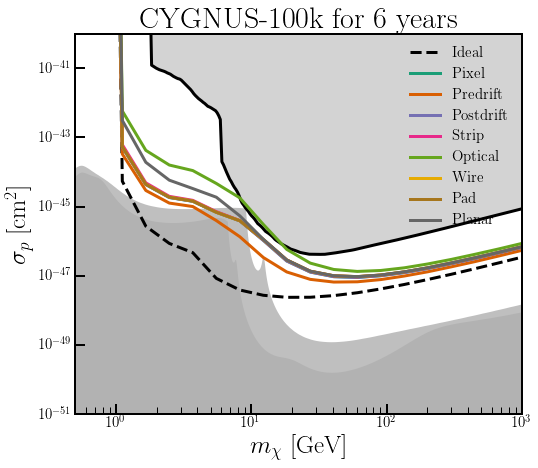

In [161]:
# 2018 Current limits
data = loadtxt("../data/SIlimits_2018.txt",delimiter=',')
mlim,slim = data[0,:],data[1,:]

# Xe and F neutrino floors
data = loadtxt("../data/nufloor_Xe.txt",delimiter=',')
m2,nu_Xe = data[0,:],data[1,:]
data = loadtxt("../data/nufloor_F.txt",delimiter=',')
m3,nu_F = data[0,:],data[1,:]

# Plot
plt.rcParams['axes.linewidth'] = 2
fig = plt.figure(figsize=(8,7))
ax = fig.add_subplot(111)
col = cm.Dark2(linspace(0,1,10))
col[0,:] = [0,0,0,1]
col[-1,:] = [0,0,0,1]
# Close-up range
xmin = 0.5
xmax = 1.0e3
ymax = 1.0e-40
ymin = 1.0e-51

# Full range
#xmin = 0.1
#xmax = 1.0e3
#ymax = 1.0e-40
#ymin = 1.0e-50

# Neutrino floor
plt.fill_between(m2, nu_Xe, y2=ymin,facecolor='Gray',alpha= 0.2)
plt.fill_between(m2, nu_F, y2=ymin,facecolor='Gray',alpha=0.5)

# Expt limits
plt.fill_between(mlim, slim, y2=ymax,facecolor='LightGray')
plt.loglog(mlim, slim,"-",linewidth=3,color='k')

# Plot lines
lsty = ["-" for x in range(0,10)]
lsty[0] ="--"
lsty[-1] ="--"
for i in range(0,9):
    plt.loglog(m,data_all[i,:],lsty[i],color=col[i,:],linewidth=3,label=fname[i])

# Labels
plt.legend(loc='upper right',fontsize=15,frameon=False)
plt.xlabel(r"$m_\chi$ [GeV]",fontsize=25)
plt.ylabel(r"$\sigma_p$ [cm$^2$]",fontsize=25)

# Limits
ax.set_xlim(left=xmin, right=xmax)
ax.set_ylim(bottom=ymin, top=ymax)


# Style
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
ax.tick_params(which='major',direction='in',width=2,length=10)
ax.tick_params(which='minor',direction='in',width=1,length=7)
plt.title(ftit,fontsize=30)
plt.show()
fig.savefig('../plots/Cygnus'+ftit+'-SI.pdf')


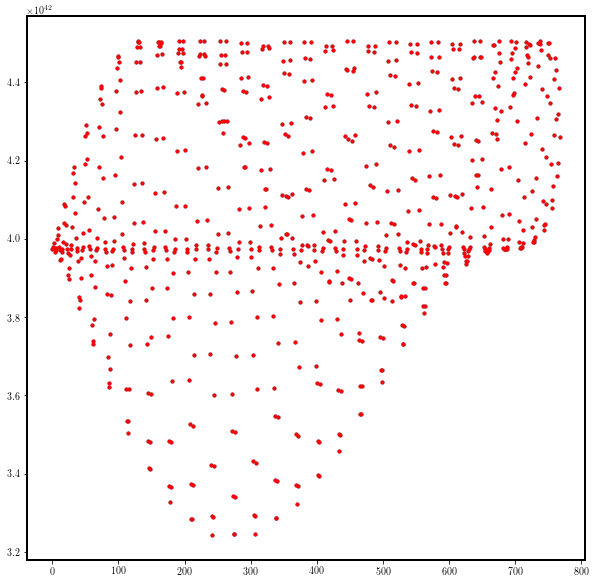

In [44]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
RD_wimp = loadtxt('../code/RD_wimp_costh.dat')
plt.plot(RD_wimp,'.')
RD_wimp = loadtxt('../code/RD_wimp_th.dat')
plt.plot(RD_wimp,'r.')
plt.show()

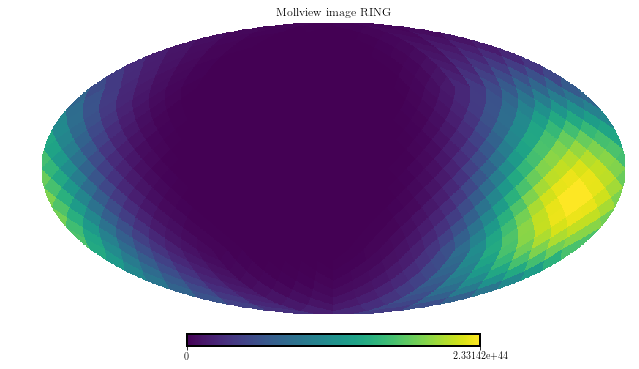

In [143]:
import healpy as hp
RD_wimp0 = loadtxt('../code/RD_wimp_0.dat')
RD_nu0 = loadtxt('../code/RD_nu_0.txt')
#hp.mollview(RD_nu0[:,1], title="Mollview image RING")
hp.mollview(RD_wimp0[:,0], title="Mollview image RING")
plt.show()

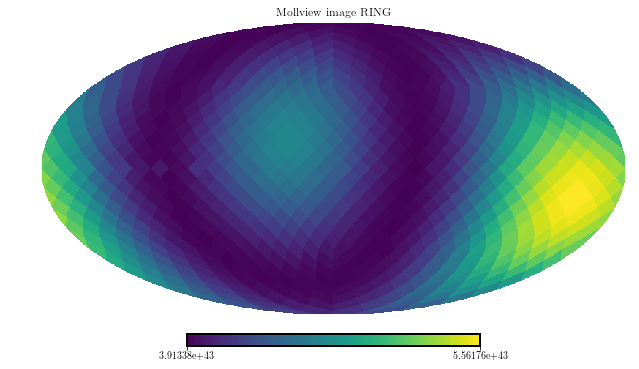

In [145]:
RD_wimp1 = loadtxt('../code/RD_wimp_1.dat')
RD_nu1 = loadtxt('../code/RD_nu_1.txt')
#hp.mollview(RD_nu1[:,1], title="Mollview image RING")
hp.mollview(RD_wimp1[:,0], title="Mollview image RING")
plt.show()

In [53]:
shape(RD_nu1)

(1536, 4)

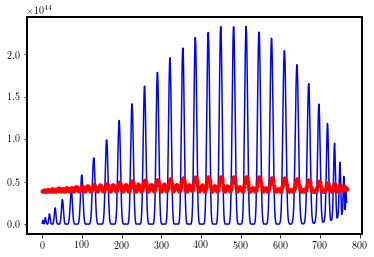

In [146]:
plt.plot(RD_wimp0[:,0],'b-')
plt.plot(RD_wimp1[:,0],'r.')
plt.show()

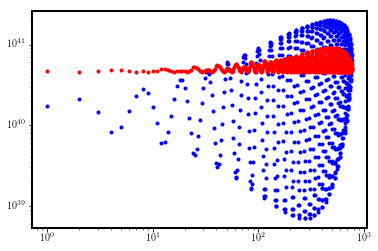

In [68]:
plt.semilogx(RD_wimp0,'b.')
plt.semilogy(RD_wimp1,'r.')
plt.show()

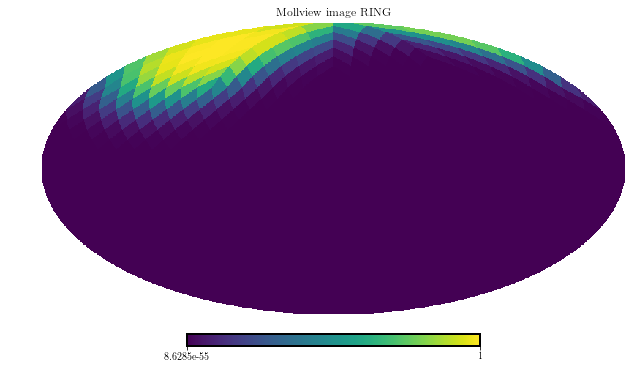

In [78]:
dat = loadtxt('../code/gauss.dat')
hp.mollview(dat[:,0], title="Mollview image RING")
plt.show()

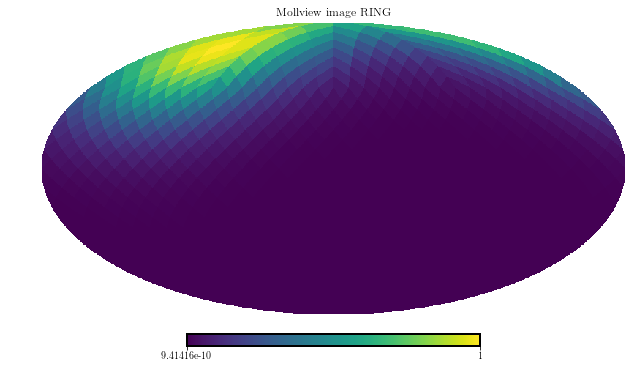

In [79]:
dat = loadtxt('../code/gauss.dat')
hp.mollview(dat[:,1], title="Mollview image RING")
plt.show()

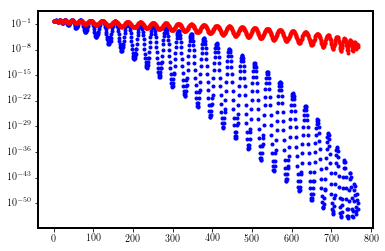

In [83]:
plt.semilogy(dat[:,0],'b.')
plt.semilogy(dat[:,1],'r.')
plt.show()

In [82]:
sigth = 30.0*pi/180.0
costhvals = linspace(-1,1,100)
thvals = acos(costhvals)
plt.plot(costhvals,exp(-thvals**2.0/(2*sigth**2.0)),'r-')
plt.show()

NameError: name 'acos' is not defined

In [114]:
lsty = ["" for x in range(0,10)]


In [117]:
lsty[0:10] = "-"


In [118]:
lsty

['-']